**Tensorflow - Save Best Model - Checkpoint and Callbacks**

In [60]:
# Get Dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [61]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
# Shape of Dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [63]:
# Shape of Datapoint
x_train[1].shape

(28, 28)

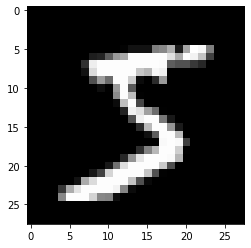

In [64]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [65]:
y_train[0]

5

In [66]:
# Normalize Images
x_train = x_train/255.0
x_test = x_test/255.0

In [67]:
# Reshape Dataset
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape((10000, 28, 28, 1))

In [81]:
# Build Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=x_train[0].shape)) #Layer 1

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) #Layer 2

model.add(MaxPool2D(pool_size=(2, 2))) # Layer 3. Adding MaxPool Layer

model.add(Dropout(0.25)) # Layer 4. Adding dropout layer. 25% of neurons will randomly drop bfore going to next layer.

model.add(Flatten()) # Layer 5. Adding Flatten Layer. Converts to 2D.

model.add(Dense(128, activation="relu")) # Layer 6. Adding Dense Layer.

model.add(Dropout(0.5)) # Layer 7. Adding dropout layer. 50% of neurons will randomly drop bfore going to next layer.

model.add(Dense(10, activation="softmax")) # Layer 8. Output Layer. 10 is the num

In [82]:
# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [85]:
# Model Checkpoint and Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "cp-{epoch:02d}-{val_accuracy:.02f}.hf"
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", verbose=1, save_best_only=True, mode="min")

In [86]:
# Train Model
history = model.fit(x_train, y_train, epochs=3, batch_size=10, validation_split=0.5, callbacks=[checkpoint])

Epoch 1/3
2998/3000 [============================>.] - ETA: 0s - loss: 0.0972 - accuracy: 0.9706
Epoch 1: val_loss improved from inf to 0.06264, saving model to cp-01-0.98.hf
INFO:tensorflow:Assets written to: cp-01-0.98.hf\assets
3000/3000 [==============================] - 67s 22ms/step - loss: 0.0972 - accuracy: 0.9706 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 2/3
2999/3000 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.9787
Epoch 2: val_loss improved from 0.06264 to 0.05994, saving model to cp-02-0.98.hf
INFO:tensorflow:Assets written to: cp-02-0.98.hf\assets
3000/3000 [==============================] - 107s 36ms/step - loss: 0.0712 - accuracy: 0.9787 - val_loss: 0.0599 - val_accuracy: 0.9828
Epoch 3/3
3000/3000 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9809
Epoch 3: val_loss improved from 0.05994 to 0.05542, saving model to cp-03-0.99.hf
INFO:tensorflow:Assets written to: cp-03-0.99.hf\assets
3000/3000 [=================